In [12]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

# Estimadores estadísticos

**Recomendación:**

Este apartado contiene algunos conceptos de Probabilidad y Estadística, para una correcta comprensión, recomiendo revisar el capítulo 2 "Probability and Statistics in a Nutshell" del libro del curso.

[Capítulo 2 Libro](https://www.syscop.de/files/2021ws/msi/msi.pdf)

## ¿Qué es un estimador?

Un estimador utiliza muchas mediciones de una variable aleatoria (**Y**), procesadas de forma computacional para estimar el valor de un vector de parámetros, para este caso se usa la variable $\theta$ para representar dicha estimación. La agrupación de las medidas se llamaran $Y_N$, el estimador sería una función de $Y_N$, debido a dicha dependencia el estimador sería una variable aleatoria también, por tanto tiene un valor medio y varianza. De manera ideal el valor esperado de la función de estimación es el parámetro real $\theta_0$ que, como ya se ha mencionado es desconocido y el objeto de la identificación). Las principales características para que un estimador pueda ser validado son las siguientes:

**Imparcialidad:** Un estimador $\theta_N$ es imparcial (unbiased), si el valor esperado del estimador es el valor real del parámetro, de lo contrario será sesgado. 

$$E\{\theta_N(Y_N)\} = \theta_0$$

**Imparcialidad asintótica:** en este caso el valor esperado del estimador con infinito número de muestras debe ser el valor real.

$$\lim_{N\rightarrow\infty}E\{\theta_N(Y_N)\} = \theta_0$$ 

**Consistencia:** Un estimador se dice consistente cuando es imparcialmente asintótico y cuando su covarianza tiende a cero para N infinita.

## Tipos de estimadores

**Estimador de Media muestral:** Uno de los ejemplos más simples de estimadores es la media simple de una variable aleatoria escalar $Y_N$ promediando sus N mediciones. El estimador sería el siguiente:  

$$\theta_N[Y_N] =\frac{1}{N}\sum_{k=1}^{N}Y[k]$$ 

El estimador es imparcial o sin sesgo debido a que su valor esperado es la **media muestral ($\mu_Y$)** de $Y_N$.

$$E\{\theta_N[Y_N]\} =\frac{1}{N}\sum_{k=1}^{N}E\{Y[k]\} = \frac{1}{N}\sum_{k=1}^{N}\mu_Y = \mu_Y$$ 

**Estimador de Varianza:** En lugar de la media simple, se puede utilizar un estimador de varianza que sería de la siguiente manera: 

$$\theta_N[Y_N] =\frac{1}{N}\sum_{k=1}^{N}(Y([k]-\mu_Y)^2$$ 

Este estimador es asintóticamente imparcial debido a que cuando N es infinito el valor esperado tiende al valor real, como es un estimador de varianza se espera que el valor real sea $\sigma_Y^2 $.

$$E(\theta_N)=E\left(\frac{1}{N}\sum_{k=1}^{N}(Y[k]-\mu_Y)^2)\right)=\frac{1}{N}\sum_{k=1}^{N}E(Y[k]-\mu_Y)^2$$

$$E(\theta_N)=\frac{1}{N}\sum_{k=1}^{N}\left(E\{Y[k]^2\}-2E\{Y[k]\mu_Y\}+E\{\mu_Y^2\}\right)$$
$$E(\theta_N)=\frac{1}{N}\sum_{k=1}^{N}\left(E\{Y[k]^2\}-E\{\mu_Y^2\}\right)$$

$$E(\theta_N)=\frac{N-1}{N}\sigma_Y^2$$

Con el número de mediciones cercano a infinito, se puede concluir que el estimador de varianza es asintóticamente imparcial dado que el valor esperado del estimador es el valor real.

$$\lim_{N\rightarrow\infty}E\{\theta_N\} = \sigma_Y^2$$ 

# EJEMPLO - Estimación de la resistencia

Dados los valores de V[k] e I[k], se espera poder estimar el valor real de la resistencia $R_0$. En teoría dicho valor debe ser la relación entre el valor real del voltaje y el valor real de corriente:

$$R_0 = \frac{V_0}{I_0}$$

Se considera que cada dato tomado debe estar o puede relacionarse con la siguiente ecuación:

$$V[k] = V_0 + \eta_V[k]$$
$$I[k] = I_0 + \eta_I[k]$$

Los ruidos incluidos para la medición tienen un valor medio de 0 y varianzas finitas de valores $\sigma_I^2$ y $\sigma_V^2$. Además que por ser dos mediciones distintas, los ruidos no están correlacionados por tanto la correlacion es 0.

## Error en cada variable

Recordar lo siguiente:

$$ R_2[N] =\frac{\frac{1}{N}\sum_{k=1}^{N}V[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]}=\frac{\frac{1}{N}\sum_{k=1}^{N}(V_0+\eta_V[k])}{\frac{1}{N}\sum_{k=1}^{N}(I_0+\eta_I[k])} $$

Verificando que el estimador sea asintóticamente imparcial:

$$\lim_{N\rightarrow\infty}E\{R_2\} = \frac{\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}(V_0+\eta_V[k])}{\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}(I_0+\eta_I[k])} $$ 

$$\lim_{N\rightarrow\infty}E\{R_2\} = \frac{V_0+\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}\eta_V[k]}{I_0+\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}(\eta_I[k])} $$

$$\lim_{N\rightarrow\infty}E\{R_2\} = \frac{V_0}{I_0} = R_0 $$

Observemos que esta estimación en la medida que N tiene a infinito, es la que se aproxima al valor real.

## Estimación usando DataFrame

<AxesSubplot: xlabel='Ii', ylabel='Vi'>

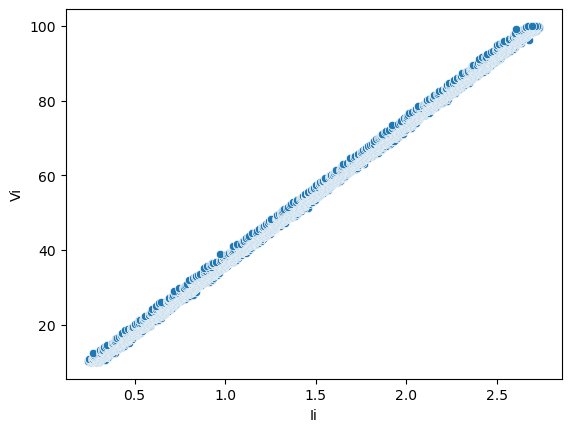

In [13]:
# Valor verdadero de Rv un número entre 10 y 50, número de muestras N
# N muestras de voltaje entre 10 y 100 V contaminadas con ruido blanco
# N muestras de corriente calculadas dividiendo cada muestra de voltaje en Rv
# y luego contaminadas con ruido blanco

Rv = random.randrange(10,50);
N = 10000
Vi = np.linspace(10,100,N) + np.random.normal(0,0.02,size=N)
#Ii = (Vi/Rv) + np.random.normal(size=Vi.shape)
Ii = (Vi/Rv) + np.random.normal(0,0.02,size=Vi.shape)
data =pd.DataFrame(data = {'Vi':Vi,'Ii':Ii})

sns.scatterplot(data,x = 'Ii',y = 'Vi')

In [14]:
# Estimación error en Variables

def est2(data):
    return np.average( data['Vi']) / np.average(data['Ii'] )
R2 = est2(data)
Rv, R2

## Mínimos cuadrados

Recordar lo siguiente:

$$ R_3[N] =\frac{\frac{1}{N}\sum_{k=1}^{N}V[k]I[k]}{\frac{1}{N}\sum_{k=1}^{N}I[k]^2}=\frac{\frac{1}{N}\sum_{k=1}^{N}(V_0+\eta_V[k])(I_0+\eta_I[k])}{\frac{1}{N}\sum_{k=1}^{N}(I_0+\eta_I[k])^2} $$

Verificando que sea asintóticamente imparcial, se procede a analizar el numerador dentro del $\lim_{N\rightarrow\infty}$:

$$\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}(V_0.I_0+V_0.\eta_I[k]+I_0.\eta_V[k]+\eta_I[k].\eta_V[k]) = V_0.I_0$$

Ahora se procede a analizar el denominador dentro del $\lim_{N\rightarrow\infty}$:

$$\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}(I_0^2+2.I_0.\eta_I[k]+\eta_I[k]^2) = I_0^2+\sigma_I^2$$

$$\lim_{N\rightarrow\infty}R_3=\frac{V_0.I_0}{I_0^2+\sigma_I^2}=\frac{R_0}{1+\frac{\sigma_I^2}{I_0^2}}$$

Se concluye que este estimador tiene un valor menor que el verdadero siempre, por tanto es sesgado.


In [15]:
# ESTIMACIÓN POR MÍNIMOS CUADRADOS
def est3(data):
    N = len(data)
    #return (sum(data['Vi']*data['Ii']) - (sum(data['Vi'])*sum(data['Ii'])/N)) / (sum(data['Ii']**2)-((sum(data['Ii']))**2)/N)
    return (sum(data['Vi']*data['Ii'])/N) / (sum(data['Ii']**2)/N)
R3 = est3(data)
Rv,R3

## Estimación simple

Recordar lo siguiente:

$$ R_1[N] =\frac{1}{N}\sum_{k=1}^{N}\frac{V[k]}{I[k]}=\frac{1}{N}\sum_{k=1}^{N}\frac{V_0+\eta_V[k]}{I_0+\eta_I[k]}$$

Verificando que sea asintóticamente imparcial, se procede a analizar el estimador dentro del $\lim_{N\rightarrow\infty}$, además se utiliza una aproximación de la Serie de Taylor para valores de |x|<1 así:

$$\frac{1}{1+x} = 1-x+x^2-x^3+x^4-x^5...$$

$$\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}\frac{V_0.(1+\frac{\eta_V[k]}{V_0})}{I_0(1+\frac{\eta_I[k]}{I_0})} = $$

$$\frac{V_0}{I_0}\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}\left(1+\frac{\eta_V[k]}{V_0}\right)\left(1-\frac{\eta_I[k]}{I_0}+(\frac{\eta_I[k]}{I_0})^2-(\frac{\eta_I[k]}{I_0})^3+(\frac{\eta_I[k]}{I_0})^4 ...\right) = $$

$$R_0\lim_{N\rightarrow\infty}\frac{1}{N}\sum_{k=1}^{N}\left(1+\frac{\eta_V[k]}{V_0}-\frac{\eta_I[k]}{I_0}-\frac{\eta_I[k].\eta_V[k]}{V_0.I_0}+(\frac{\eta_I[k]}{I_0})^2+ ...\right) = $$

$$\lim_{N\rightarrow\infty}R_1[N] =R_0.\left(1+\frac{\sigma_I^2}{I_0^2}\right)$$

Se concluye que este estimador tiene un valor mayor que el verdadero siempre, por tanto es sesgado.

In [16]:
# ESTIMACIÓN SIMPLE
def est1(data):
    return np.average( data['Vi'] / data['Ii'] )

R1 = est1(data)
Rv, R1

In [17]:
ns = range(50,10000,50)
R1Perf = []
R2Perf = []
R3Perf = []
for n in ns:
    data_sub = data.sample(n)
    R1Perf.append(est1(data_sub))
    R2Perf.append(est2(data_sub))
    R3Perf.append(est3(data_sub))
    
dataPerf = pd.DataFrame(data = {'muestras':ns,'ES':R1Perf,
                                'EV':R2Perf,'LS':R3Perf
                               })

<AxesSubplot: xlabel='muestras', ylabel='value'>

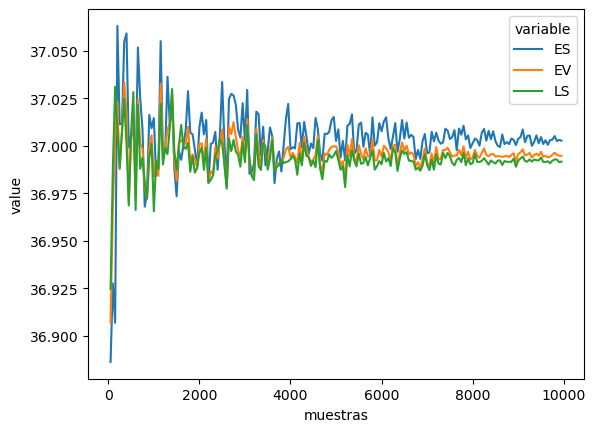

In [18]:
sns.lineplot(x='muestras', y='value', hue='variable', 
             data=pd.melt(dataPerf, ['muestras']))

## [Laboratorio estimación R](ejercicio_02_estima_R.ipynb)